# Importacion de datos

## Librerias

In [94]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score
import pandas as pd

## Datos

In [95]:
#Dataset Penguins
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Preparación de los datos

In [96]:
# separamos datos de entrada y salida
X = penguins.drop('species', axis=1)
y = penguins['species']
# separamos train y test
Xtrain, Xtest, ytrain, ytest  = train_test_split(X, y, test_size=0.33, random_state=1)

# Instanciacion de modelos

In [97]:
categorical = CategoricalNB()
gaussian = GaussianNB()
multinomial = MultinomialNB()
complement = ComplementNB()
bernoulli = BernoulliNB()

# Matriz de confusión

In [104]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adeante

from sklearn.metrics import confusion_matrix, precision_score
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray     -> Los valores calcuylados de las clases después de realizar la predicción
# class  : ndarray     -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None,
                          precision=None): # Add precision parameter
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    # Update titleSup to include precision if provided
    if titleSup and precision is not None:
        titleSup = f"{titleSup} Precision: {precision:.2f}"
    elif precision is not None:
        titleSup = f"Precision: {precision:.2f}"
    if titleSup:
        fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax


# Categorical

Confusion matrix, without normalization
[[48  0  0]
 [ 1 22  0]
 [ 0  0 41]]


<Axes: title={'center': 'Matriz de Confusión para CategoricalNB'}, xlabel='Predicted label', ylabel='True label'>

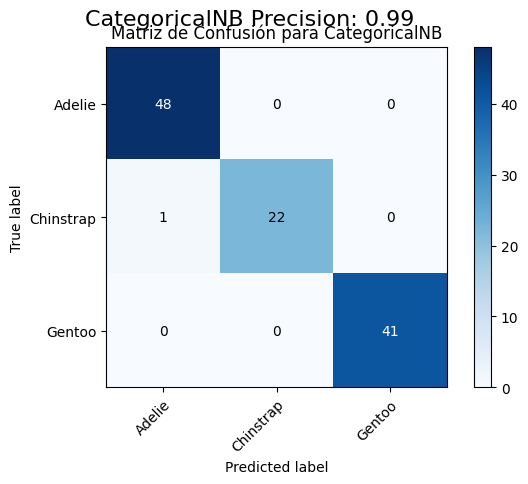

In [105]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.metrics import precision_score # Import precision_score

# Crear copias para este modelo para evitar modificar Xtrain/Xtest originales prematuramente
Xtrain_cat = Xtrain.copy()
Xtest_cat = Xtest.copy()
ytrain_cat = ytrain.copy()
ytest_cat = ytest.copy()

# Identificar las columnas categóricas nominales que necesitan codificación
nominal_categorical_cols = ['island', 'sex']
# Identificar las columnas numéricas que necesitan discretización
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Asegurarse de que todas las columnas a usar se incluyan en la operación de eliminación de NaN
cols_to_check_for_nan = nominal_categorical_cols + numerical_cols

# Manejar valores NaN eliminando filas de Xtrain y Xtest
# Esto asegura que no se pasen NaN a los codificadores ni al modelo
train_idx_to_keep = Xtrain_cat.dropna(subset=cols_to_check_for_nan).index
Xtrain_cat = Xtrain_cat.loc[train_idx_to_keep]
ytrain_cat = ytrain_cat.loc[train_idx_to_keep]

test_idx_to_keep = Xtest_cat.dropna(subset=cols_to_check_for_nan).index
Xtest_cat = Xtest_cat.loc[test_idx_to_keep]
ytest_cat = ytest_cat.loc[test_idx_to_keep]

# Aplicar Ordinal Encoding para convertir categorías nominales de tipo string a enteros
# handle_unknown='use_encoded_value', unknown_value=-1 asegura que las categorías no vistas se manejen correctamente.
# Como los NaN se eliminan, y suponiendo que no aparecen nuevas categorías en test respecto a train, no debería generarse -1.
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
Xtrain_cat[nominal_categorical_cols] = encoder.fit_transform(Xtrain_cat[nominal_categorical_cols])
Xtest_cat[nominal_categorical_cols] = encoder.transform(Xtest_cat[nominal_categorical_cols])

# Aplicar KBinsDiscretizer para convertir características numéricas en bins discretos
# n_bins: número de bins para la discretización. Se usan 5 como demostración.
# encode='ordinal': la salida son bins enteros.
# strategy='uniform': los bins tienen el mismo ancho.
# subsample=None: asegura un comportamiento determinista.
discretizer = KBinsDiscretizer(
    n_bins=5,
    encode='ordinal',
    strategy='uniform',
    subsample=None,
    random_state=42
)

# Ajustar el discretizador con los datos de entrenamiento para las columnas numéricas
# y transformar tanto los datos de entrenamiento como de prueba
Xtrain_cat[numerical_cols] = discretizer.fit_transform(Xtrain_cat[numerical_cols])
Xtest_cat[numerical_cols] = discretizer.transform(Xtest_cat[numerical_cols])

# Convertir todas las columnas de características a tipo entero,
# ya que KBinsDiscretizer y OrdinalEncoder (con encode='ordinal') devuelven floats
# CategoricalNB espera entradas enteras
Xtrain_cat = Xtrain_cat.astype(int)
Xtest_cat = Xtest_cat.astype(int)

# Ajustar el modelo CategoricalNB
categorical.fit(Xtrain_cat, ytrain_cat)
y_model_categorical = categorical.predict(Xtest_cat)

# Preparar los datos para la visualización de la matriz de confusión
# La función plot_confusion_matrix espera y_true y y_pred como etiquetas numéricas,
# y `classes` como los nombres de las clases
# Obtener los nombres únicos de las especies desde las clases del modelo entrenado
classes_penguins = categorical.classes_

# Crear un mapeo de nombre de especie a entero (0, 1, 2...)
species_mapping = {species: i for i, species in enumerate(classes_penguins)}

# Convertir ytest_cat (Series de strings) a etiquetas numéricas
ytest_numeric = ytest_cat.map(species_mapping)

# Convertir y_model_categorical (array numpy de strings) a etiquetas numéricas
y_pred_numeric = np.array([species_mapping[s] for s in y_model_categorical])

# Calcular la precisión
precision_categorical = precision_score(ytest_numeric, y_pred_numeric, average='weighted')

# Dibujar la matriz de confusión
plot_confusion_matrix(
    ytest_numeric,
    y_pred_numeric,
    classes=classes_penguins,
    normalize=False,
    title='Matriz de Confusión para CategoricalNB',
    titleSup='CategoricalNB',
    precision=precision_categorical
)


#Multinomial


Confusion matrix, without normalization
[[48  0  0]
 [ 5 18  0]
 [ 0  0 41]]


<Axes: title={'center': 'Confusion Matrix for MultinomialNB'}, xlabel='Predicted label', ylabel='True label'>

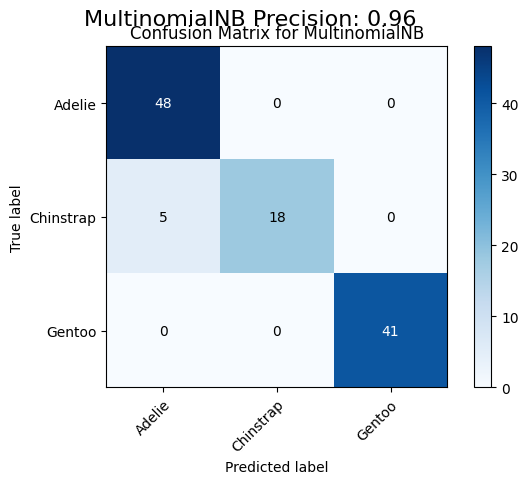

In [106]:
multinomial.fit(Xtrain_cat, ytrain_cat)
y_model_multinomial = multinomial.predict(Xtest_cat)

# Convert predictions to numeric labels using the species_mapping
y_pred_multinomial_numeric = np.array([species_mapping[s] for s in y_model_multinomial])

# Calculate precision for MultinomialNB
precision_multinomial = precision_score(ytest_numeric, y_pred_multinomial_numeric, average='weighted')

# Plot the confusion matrix
plot_confusion_matrix(ytest_numeric, y_pred_multinomial_numeric, classes=classes_penguins, normalize=False, title='Confusion Matrix for MultinomialNB', titleSup='MultinomialNB', precision=precision_multinomial)


#Complement

Confusion matrix, without normalization
[[47  0  1]
 [22  1  0]
 [ 0  0 41]]


<Axes: title={'center': 'Confusion Matrix for ComplementNB'}, xlabel='Predicted label', ylabel='True label'>

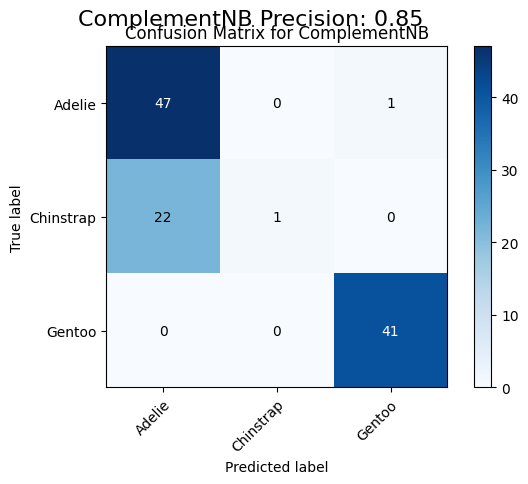

In [107]:
complement.fit(Xtrain_cat, ytrain_cat)
y_model_complement = complement.predict(Xtest_cat)

# Convert predictions to numeric labels using the species_mapping
y_pred_complement_numeric = np.array([species_mapping[s] for s in y_model_complement])

# Calculate precision for ComplementNB
precision_complement = precision_score(ytest_numeric, y_pred_complement_numeric, average='weighted')

# Plot the confusion matrix
plot_confusion_matrix(ytest_numeric, y_pred_complement_numeric, classes=classes_penguins, normalize=False, title='Confusion Matrix for ComplementNB', titleSup='ComplementNB', precision=precision_complement)


# Bernoulli


Confusion matrix, without normalization
[[23 16  9]
 [ 4 19  0]
 [ 0  0 41]]


<Axes: title={'center': 'Confusion Matrix for BernoulliNB'}, xlabel='Predicted label', ylabel='True label'>

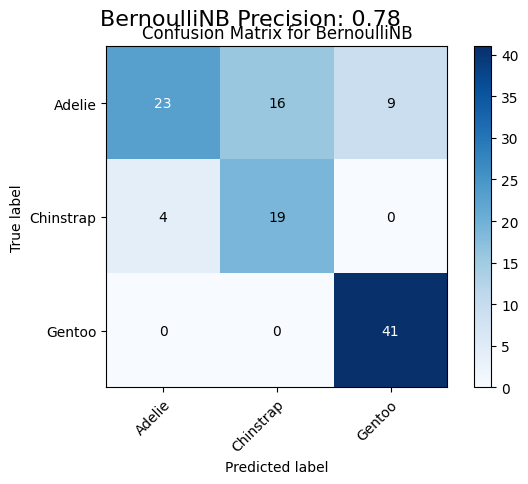

In [108]:
bernoulli.fit(Xtrain_cat, ytrain_cat)
y_model_bernoulli = bernoulli.predict(Xtest_cat)

# Convert predictions to numeric labels using the species_mapping
y_pred_bernoulli_numeric = np.array([species_mapping[s] for s in y_model_bernoulli])

# Calculate precision for BernoulliNB
precision_bernoulli = precision_score(ytest_numeric, y_pred_bernoulli_numeric, average='weighted')

# Plot the confusion matrix
plot_confusion_matrix(ytest_numeric, y_pred_bernoulli_numeric, classes=classes_penguins, normalize=False, title='Confusion Matrix for BernoulliNB', titleSup='BernoulliNB', precision=precision_bernoulli)


#Gaussian

Confusion matrix, without normalization
[[33 14  1]
 [ 0 23  0]
 [ 0  0 41]]


<Axes: title={'center': 'Confusion Matrix for GaussianNB'}, xlabel='Predicted label', ylabel='True label'>

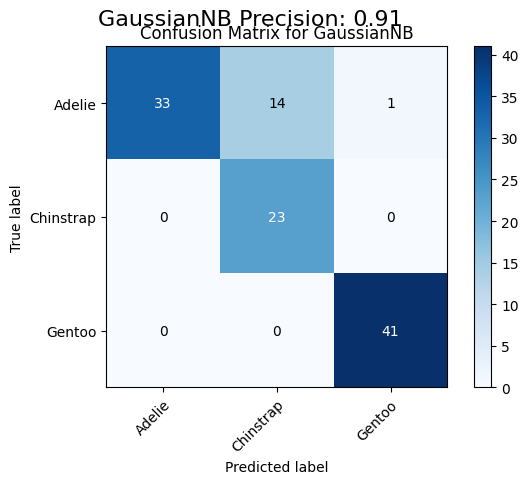

In [109]:
gaussian.fit(Xtrain_cat, ytrain_cat)
y_model_gaussian = gaussian.predict(Xtest_cat)

# Convert predictions to numeric labels using the species_mapping
y_pred_gaussian_numeric = np.array([species_mapping[s] for s in y_model_gaussian])

# Calculate precision for GaussianNB
precision_gaussian = precision_score(ytest_numeric, y_pred_gaussian_numeric, average='weighted')

# Plot the confusion matrix
plot_confusion_matrix(ytest_numeric, y_pred_gaussian_numeric, classes=classes_penguins, normalize=False, title='Confusion Matrix for GaussianNB', titleSup='GaussianNB', precision=precision_gaussian)
